In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings("ignore")


<h1>Data

In [2]:
import pandas as pd
import requests
import io
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


dependent variable : class /n
independent : 22 col

In [4]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
for i in df.columns:
    print('column Name  :          ',i)
    print(df[i].value_counts())

column Name  :           class
e    4208
p    3916
Name: class, dtype: int64
column Name  :           cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
column Name  :           cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
column Name  :           cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
column Name  :           bruises
f    4748
t    3376
Name: bruises, dtype: int64
column Name  :           odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
column Name  :           gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
column Name  :           gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
column Name  :           gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
column Name  :           

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [11]:
df['stalk-root'].mode()

0    b
dtype: object

In [12]:
df['stalk-root'].fillna(df['stalk-root'].mode()[0],inplace = True)

In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

gill-spacing     c     w
class                   
e             3008  1200
p             3804   112


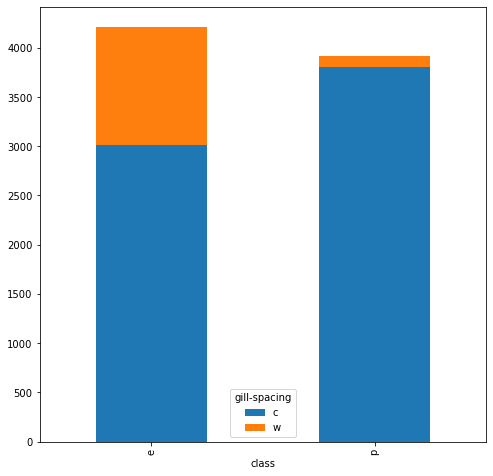

In [14]:
class_bi_table = pd.crosstab(index=df["class"], columns=df["gill-spacing"])
print(class_bi_table)
class_bi_table.plot(kind="bar", figsize=(8,8),stacked=True);

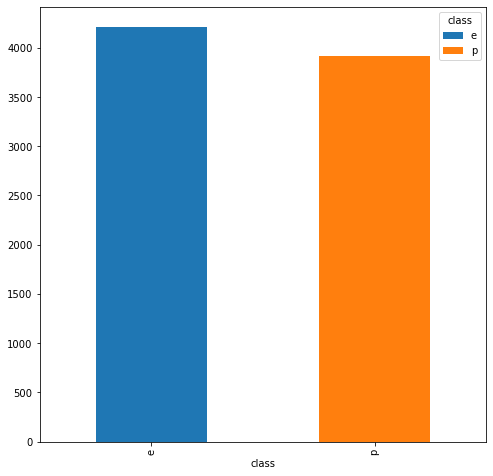

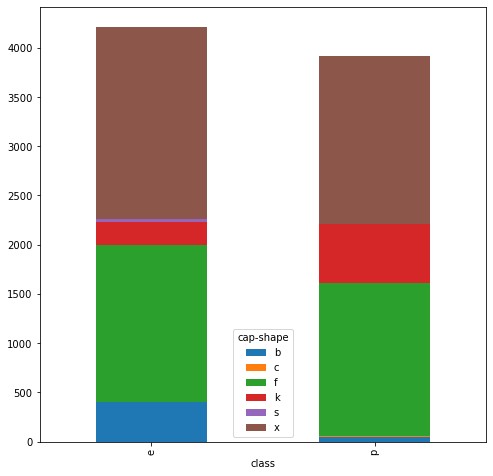

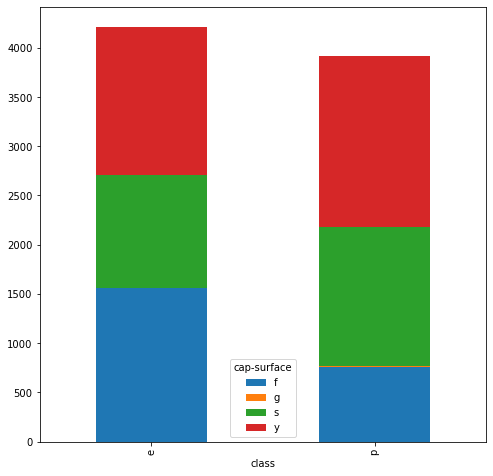

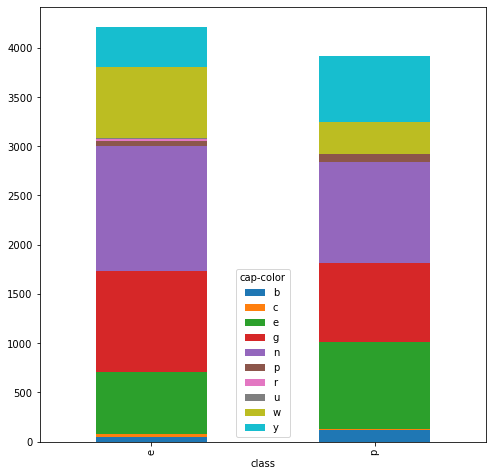

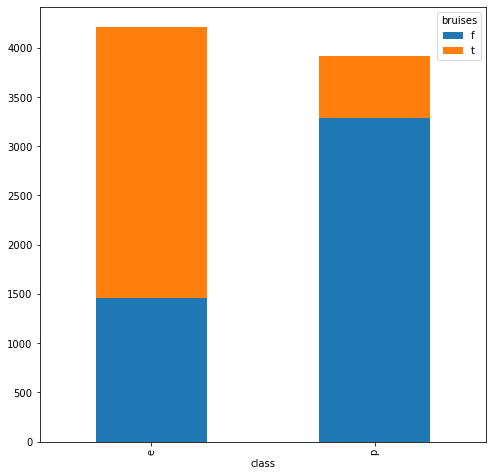

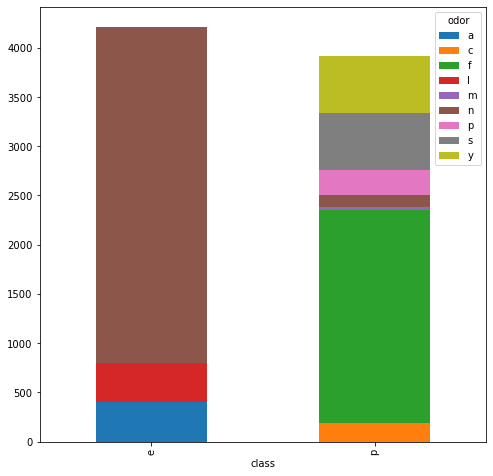

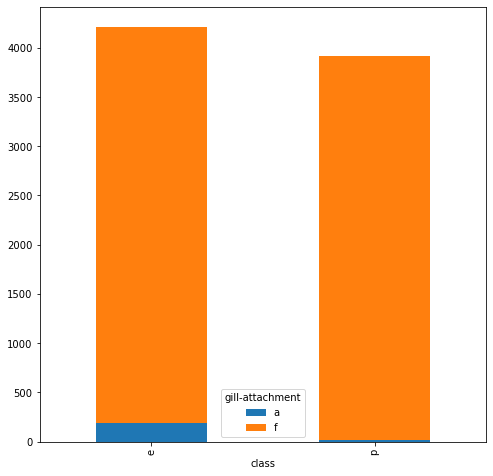

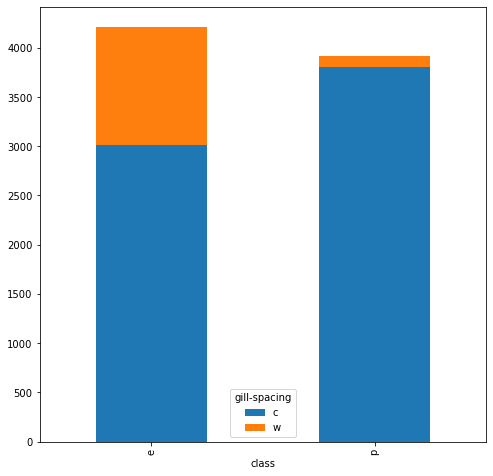

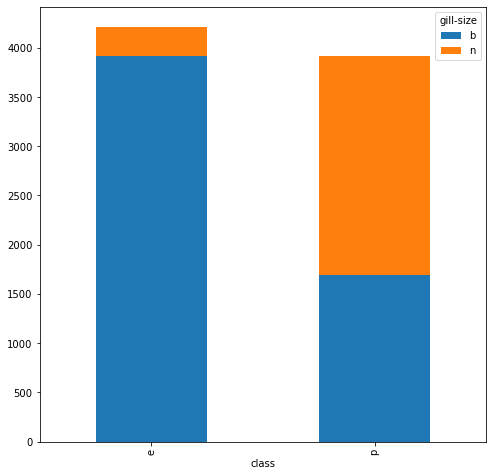

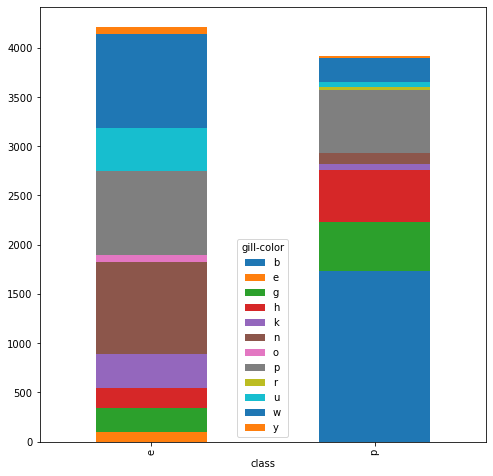

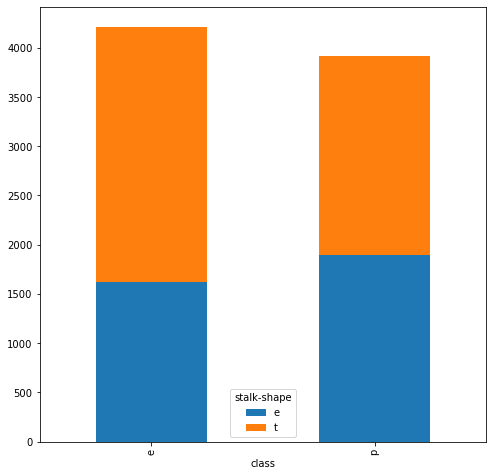

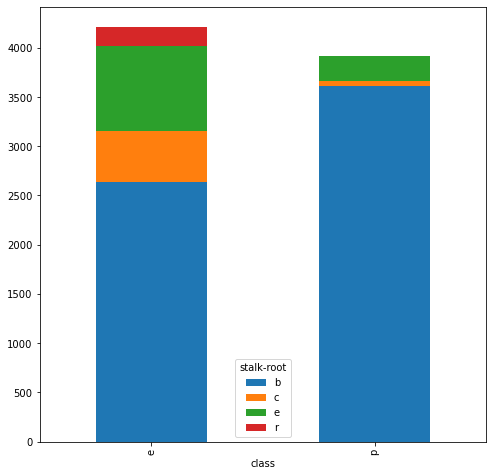

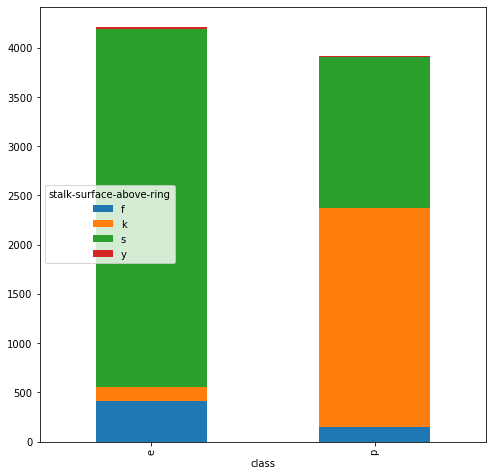

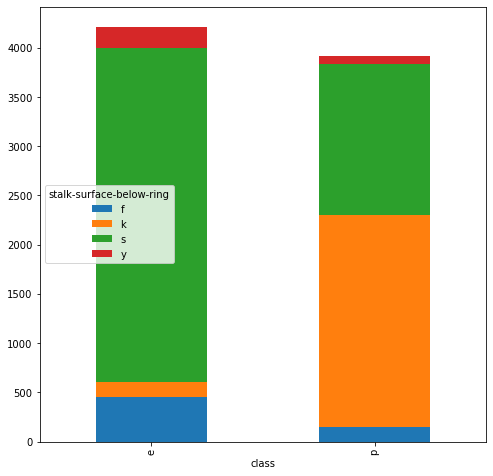

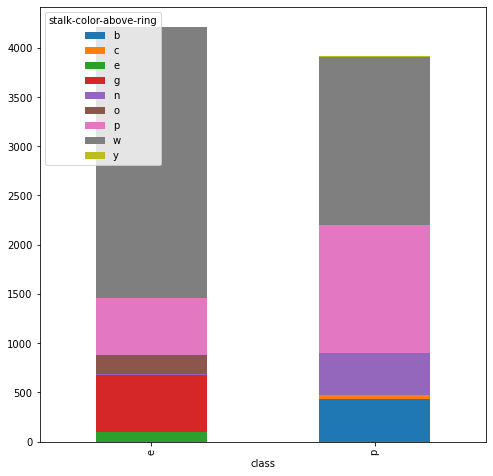

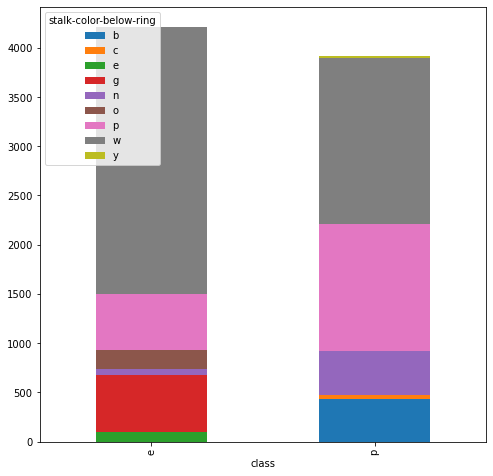

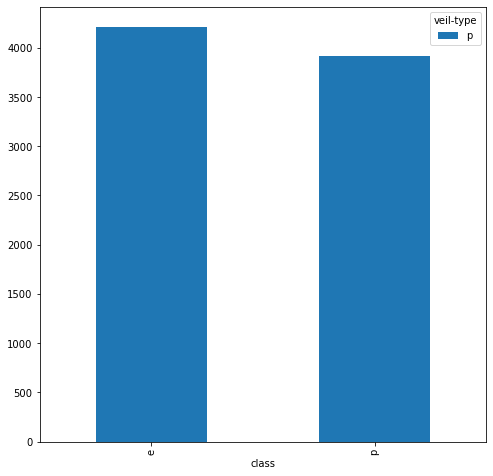

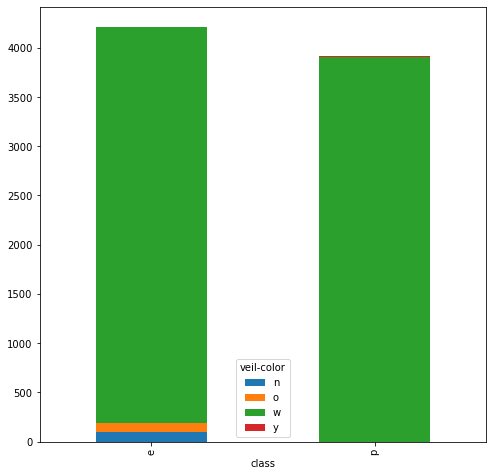

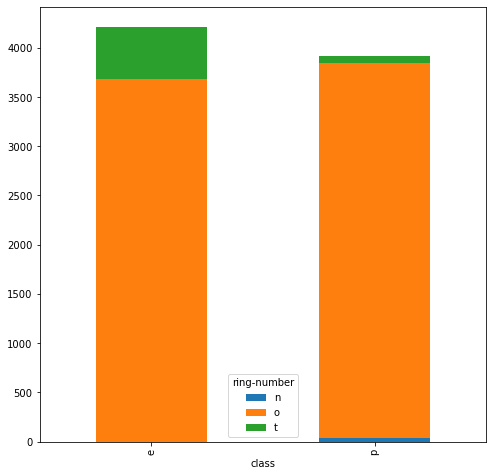

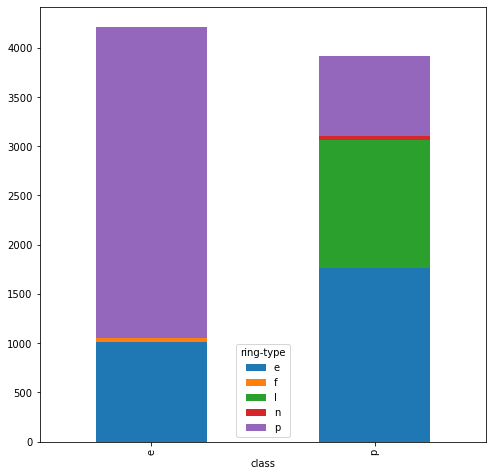

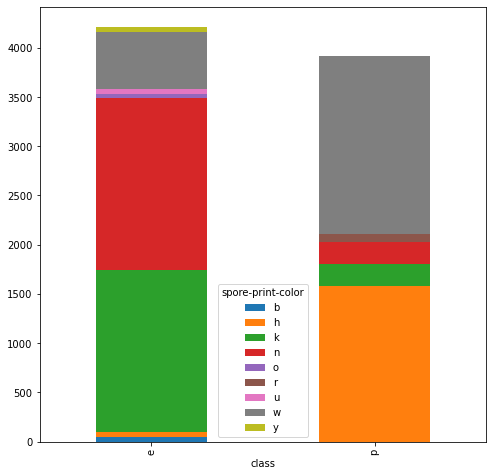

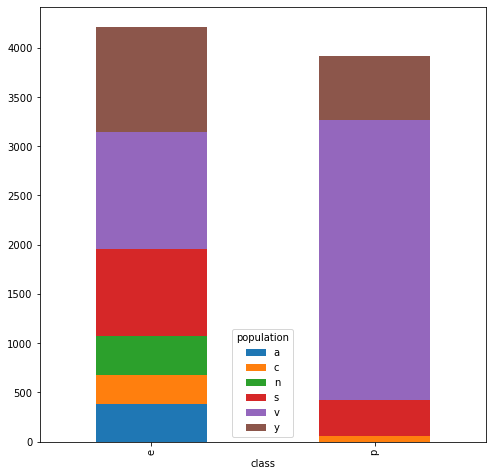

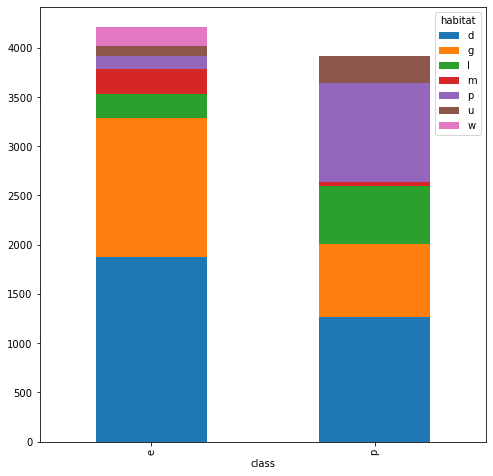

In [15]:
for i in df.columns:
    class_bi_table = pd.crosstab(index=df["class"], columns=df[i])
    #print(class_bi_table)
    class_bi_table.plot(kind="bar", figsize=(8,8),stacked=True);

In [18]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)
import seaborn as sns
corr_mat = df.corr()
plt.figure(figsize = [22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1584x864 with 0 Axes>

In [ ]:
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    print(le.classes_)

In [ ]:
df

<h1> Modeling

In [ ]:
x = df.drop("class", axis = 1)
y= df["class"]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0:1], test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
LR = LogisticRegression()
LR.fit(x_train,y_train)
predir = LR.predict(x_test)
print(accuracy_score(y_test,predir))
print(confusion_matrix(y_test,predir))
print(classification_report(y_test,predir))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model : ", scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, x, y, cv=5)
print("cross validation score of Decision Tree model : ", scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random forest model : ", scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model : ", scr.mean())

In [17]:
import pickle 
filename = 'mushrooms.pkl'
pickle.dump(LR, open(filename, 'wb'))

NameError: name 'LR' is not defined